In [1]:
# use poolformer?
import torch
import os
backbone = torch.hub.load('facebookresearch/dino:main', 'dino_vits8')

Using cache found in /home/wg25r/.cache/torch/hub/facebookresearch_dino_main


In [ ]:
root = "/mnt/fastdata/CDNet/"
frames = sorted(os.listdir(f"{root}/in"))

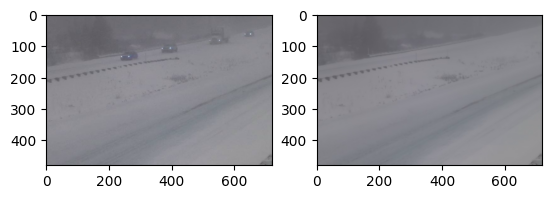

In [10]:
import pylab
import cv2
pylab.subplot(1, 2, 1)
pylab.imshow(cv2.imread(f"{root}/in/{frames[10000]}"))
pylab.subplot(1, 2, 2)
pylab.imshow(cv2.imread(f"{root}/long/{frames[10000]}"))

In [17]:
import torchvision

mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)

in_image = cv2.imread(f"{root}/in/{frames[10000]}")
in_image = cv2.resize(in_image, (512, 512))
in_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2RGB)
in_image = torch.tensor(in_image).permute(2, 0, 1).unsqueeze(0).float() / 255.0
in_image = torchvision.transforms.functional.normalize(in_image, mean, std)

long_image = cv2.imread(f"{root}/long/{frames[10000]}")
long_image = cv2.resize(long_image, (512, 512))
long_image = cv2.cvtColor(long_image, cv2.COLOR_BGR2RGB)
long_image = torch.tensor(long_image).permute(2, 0, 1).unsqueeze(0).float() / 255.0
long_image = torchvision.transforms.functional.normalize(long_image, mean, std)

in_features = backbone.get_intermediate_layers(in_image)[0][0,1:]
long_features = backbone.get_intermediate_layers(long_image)[0][0,1:]
in_features.shape, long_features.shape


(torch.Size([4096, 384]), torch.Size([4096, 384]))

In [18]:
long_features = long_features.mean(0)
corr = torch.einsum("sc, c -> s", in_features, long_features)

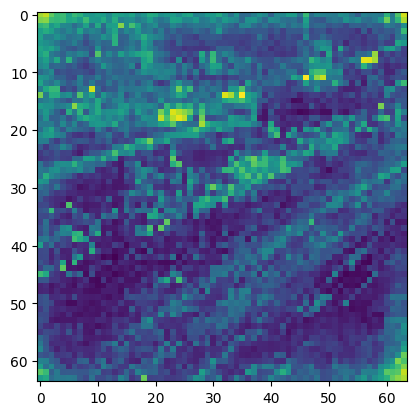

In [22]:
pylab.imshow(-corr.reshape(64, 64).detach().cpu())